In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
df = pd.read_csv("filtered-data.csv")
df.head()

In [ ]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
cor = df.corr()
sns.color_palette("viridis", as_cmap=True)
sns.heatmap(cor, annot=True)

In [ ]:
df = pd.read_csv("filtered-data.csv", usecols=["Rooms","Price","Propertycount","Distance","Type_h","Type_t",	"Type_u","Suburb"	])
df.head()

,Suburb,Rooms,Price,Propertycount,Distance,Type_h,Type_t,Type_u
0,0,3,1490000.0,4019,3.0,1,0,0
1,0,3,1220000.0,4019,3.0,1,0,0
2,0,3,1420000.0,4019,3.0,1,0,0
3,1,3,1515000.0,1543,7.5,1,0,0
4,2,2,670000.0,3464,10.4,1,0,0


<Axes: xlabel='Rooms', ylabel='Price'>

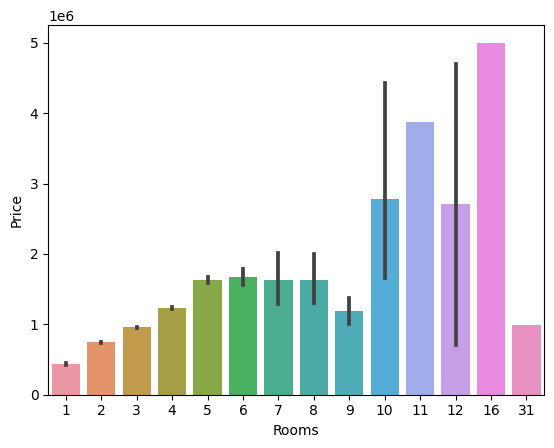

In [ ]:
sns.barplot(data = df, x='Rooms', y='Price')

In [ ]:
import matplotlib.pyplot as plt

#Scikit Learn Imports
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
df = df.drop(columns=["Date", "Unnamed: 0"])

In [ ]:
X = df.drop('Price',axis =1).values
y = df['Price'].values
print(len(X))

48433


In [ ]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print(f"Train set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")

Train set shape: (29059, 7)
Validation set shape: (9687, 7)
Test set shape: (9687, 7)


In [ ]:
scaler = StandardScaler()

#Fit the StandardScaler to the training data
X_train = scaler.fit_transform(X_train)

# Apply the StandardScaler, but not fit, to the validation data
X_val = scaler.transform(X_val)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mean_squared_error
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.keras.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name="Adadelta",
  
)

In [ ]:
model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))
model.compile('Adam',loss='mean_squared_error')

In [ ]:
history=model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val),
          batch_size=128,epochs=250)
model.summary()

Epoch 1/250
228/228 [==============================] - 2s 3ms/step - loss: 1343211044864.0000 - val_loss: 1365538111488.0000
Epoch 2/250
228/228 [==============================] - 1s 2ms/step - loss: 1337049219072.0000 - val_loss: 1349231181824.0000
Epoch 3/250
228/228 [==============================] - 1s 3ms/step - loss: 1298605015040.0000 - val_loss: 1279222611968.0000
Epoch 4/250
228/228 [==============================] - 1s 3ms/step - loss: 1186001977344.0000 - val_loss: 1114641530880.0000
Epoch 5/250
228/228 [==============================] - 1s 3ms/step - loss: 974702772224.0000 - val_loss: 855297884160.0000
Epoch 6/250
228/228 [==============================] - 1s 3ms/step - loss: 699499610112.0000 - val_loss: 573548527616.0000
Epoch 7/250
228/228 [==============================] - 1s 3ms/step - loss: 455325974528.0000 - val_loss: 372993687552.0000
Epoch 8/250
228/228 [==============================] - 1s 3ms/step - loss: 316301180928.0000 - val_loss: 284101935104.0000
Epoch 9/

<Axes: >

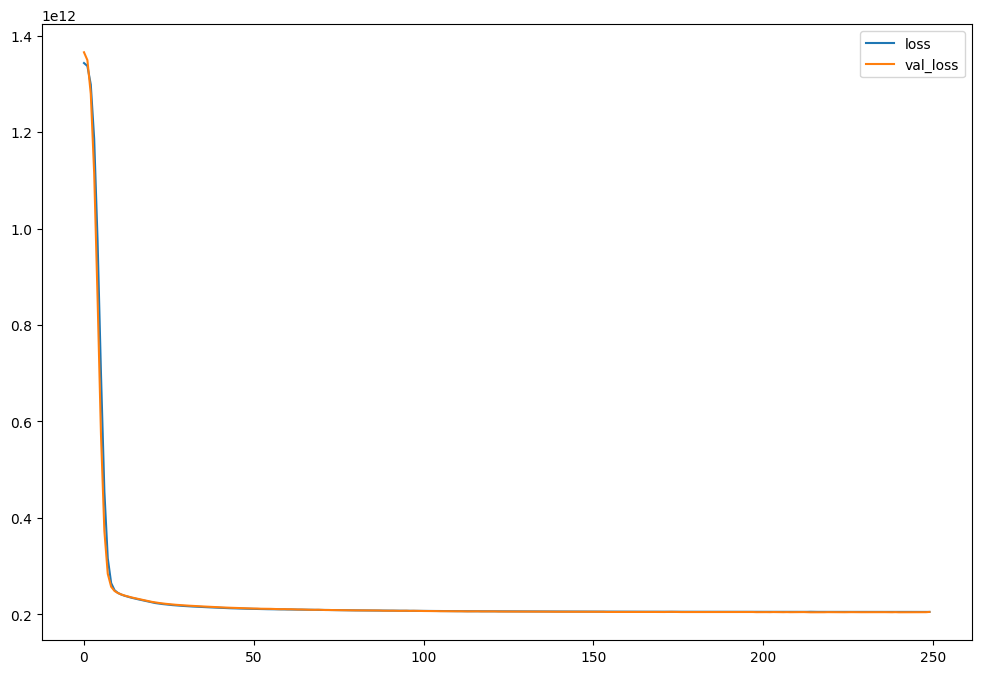

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [ ]:
#Predict on the validation data
y_pred = model.predict(X_val)
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
score=r2_score(y_val,y_pred)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_val,y_pred))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_val,y_pred)))

Text(0, 0.5, 'Predicted')

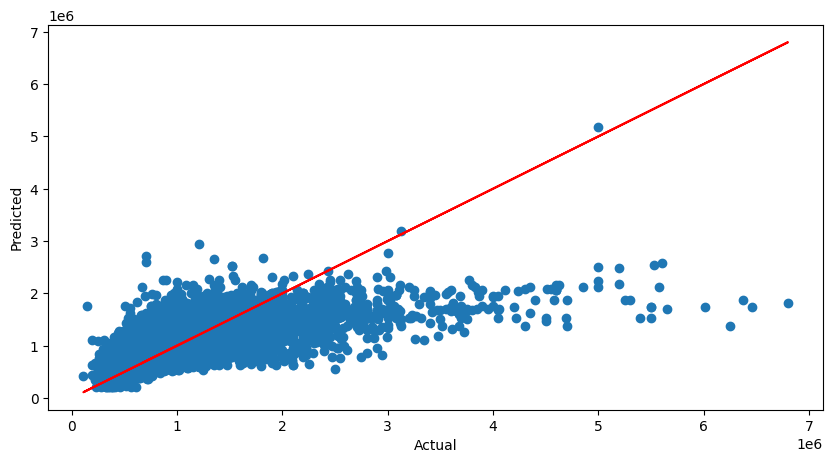

In [ ]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val,y_pred)
# Perfect predictions
plt.plot(y_val,y_val,'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')


In [ ]:
import seaborn as sns

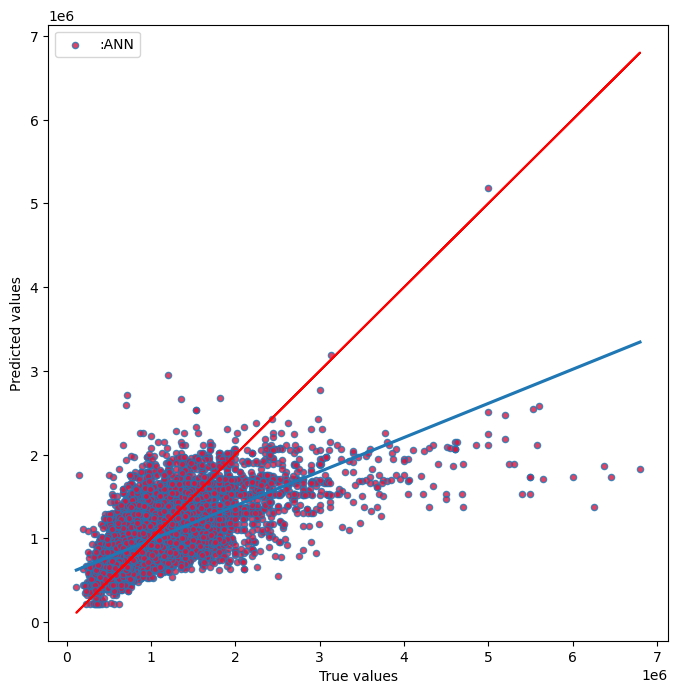

In [ ]:
plt.figure(figsize=(8,8))

ax=sns.regplot(x=y_val, y=y_pred, ci=None, scatter_kws={'s':20,'facecolor':'crimson'},label=":ANN")
plt.plot(y_val,y_val,'r')
ax.set(xlabel='True values', ylabel='Predicted values')
plt.legend(fontsize=10)
plt.show()

In [ ]:
# Extract the weights from the model
weights = model.get_weights()
print(weights)